# Import Necessary Libraries

In [43]:
from datetime import datetime
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.stats import pearsonr
import scipy as sp
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn import linear_model
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from scipy.stats import shapiro
from scipy.stats import normaltest
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
plt.style.use('seaborn')
%matplotlib inline
pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 1000)

## Read in Data to DataFrame

In [44]:
df = pd.read_csv('vehicles.csv')

In [45]:
df.drop(columns=['id', 'county', 'url', 'region_url', 'image_url', 'description', 'vin', 'region', 'model', 'lat', 'long'], inplace=True)

In [46]:
df = df[df['price'] > 500]
df = df[df['price'] < 5000000]

In [47]:
df = df[df['odometer'] < 400000 ]

In [48]:
df.dropna(subset = ['manufacturer'], inplace = True)

In [49]:
df.dropna(subset = ['condition'], inplace = True)

In [50]:
df.dropna(subset=['size'], inplace = True)

In [51]:
df.dropna(subset = ['odometer'], inplace = True)

In [52]:
df.dropna(subset = ['fuel'], inplace = True)

In [53]:
title_dict = {'clean':1, 'rebuilt':1, 'salvage':0, 'lien':0, 'missing':0, 'parts only':0}
df['title_status'].replace(title_dict, inplace = True)

In [54]:
condition_dict = {'excellent':'good', 'new':'good', 'good':'ok', 'like new':'ok', 'fair':'poor', 'salvage':np.nan}
df.condition.replace(condition_dict, inplace = True)
df.dropna(subset = ['condition'], inplace = True)

In [55]:
cylinder_dict = {'12 cylinders':10, '10 cylinders':10, '8 cylinders':8, '6 cylinders':6, '5 cylinders':5, '4 cylinders':4, '3 cylinders':3, 'other':np.nan}
df.cylinders.replace(cylinder_dict, inplace = True)
df.dropna(subset = ['cylinders'], inplace = True)

In [56]:
manufact_dict1 = {'ford': 1, 'chevrolet':1, 'toyota':3, 'honda':3, 'nissan':3, 'gmc':1, 'ram':1, 'jeep':1,
       'dodge':1, 'bmw':2, 'volkswagen':2, 'hyundai':3, 'subaru':1, 'mercedes-benz':2,
       'chrysler':1, 'kia':3, 'cadillac':1, 'lexus':3, 'buick':1, 'mazda':3, 'audi':2,
       'pontiac':1, 'acura':3, 'lincoln':1, 'infiniti':3, 'volvo':2, 'mitsubishi':3,
       'mercury':1, 'mini':2, 'saturn':1, 'rover':2, 'jaguar':2, 'fiat':2, 'alfa-romeo':2,
       'harley-davidson':np.nan, 'datsun':2, 'land rover':2, 'ferrari':2, 'porche':2,
       'aston-martin':2, 'morgan':2, 'tesla':1, 'hennessey':np.nan}
df.manufacturer.replace(manufact_dict1, inplace = True)
df.dropna(subset = ['manufacturer'], inplace = True)
manufact_dict2 = {1:'usa', 2:'euro', 3:'asia'}
df.manufacturer.replace(manufact_dict2, inplace = True)

In [57]:
state_dict = {'ca':1, 'fl':1, 'ny':1, 'tx':1, 'mi':1, 'wi':1, 'oh':1, 'nc':1, 'pa':1, 'or':1, 'va':1, 'mn':1,
       'tn':0, 'co':0, 'ma':1, 'ia':0, 'il':1, 'in':1, 'al':1, 'nj':1, 'az':0, 'ky':0, 'sc':1, 'ks':0,
       'mo':0, 'ok':0, 'id':0, 'mt':0, 'ga':1, 'ct':1, 'vt':0, 'ar':0, 'wa':1, 'nm':0, 'md':1, 'la':1,
       'nh':1, 'ms':1, 'ri':1, 'ak':1, 'me':1, 'dc':1, 'nv':0, 'sd':0, 'hi':1, 'ne':0, 'de':1, 'nd':0,
       'wv':0, 'ut':0, 'wy':0} 
df.state.replace(state_dict, inplace = True)
df.dropna(subset = ['state'], inplace = True)
df['coast'] = df['state']
df.drop(columns = ['state'], inplace = True)

In [58]:
color_dict={'white':1, 'black':1, 'silver':1, 'grey':1, 'blue':1, 'red':1, 'green':1, 'brown':1,
       'custom':0, 'yellow':0, 'orange':0, 'purple':0}
df.paint_color.replace(color_dict, inplace = True)
df.dropna(subset = ['paint_color'], inplace = True)

In [59]:
transmission_dict = {'automatic':1, 'other':1, 'manual':0}
df.transmission.replace(transmission_dict, inplace = True)
df.dropna(subset = ['transmission'], inplace = True)

In [60]:
drive_dict = {'4wd':1, 'fwd':0, 'rwd':0}
df.drive.replace(drive_dict, inplace = True)
df.dropna(subset = ['drive'], inplace = True)

In [61]:
type_dict = {'SUV':'suv', 'sedan':'car', 'truck':'truck', 'pickup':'truck', 'coupe':'car', 'van':'van', 'hatchback':'car',
       'mini-van':'van', 'convertible':'car', 'wagon':'car', 'other':np.nan, 'offroad':'suv', 'bus':'van'}
df.type.replace(type_dict, inplace = True)
df.dropna(subset = ['type'], inplace = True)

In [62]:
fuel_dict = {'hybrid':'other', 'electric':'other'}
df.fuel.replace(fuel_dict, inplace = True)

In [63]:
df.dropna(inplace = True)

In [64]:
df.shape

(99577, 14)

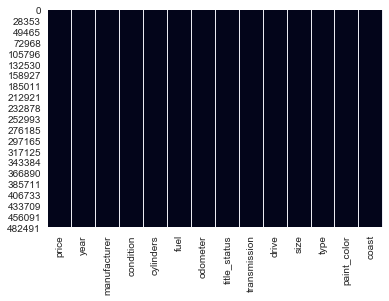

In [65]:
sns.heatmap(df.isnull(), cbar = False)

In [66]:
df['price'] = [float(i) for i in df['price']]

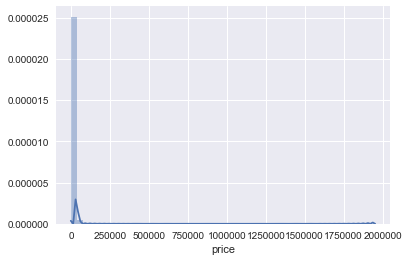

In [67]:
sns.distplot(df.price)

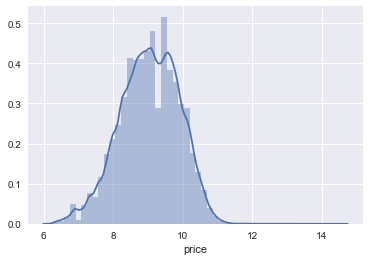

In [68]:
sns.distplot(np.log(df.price))

In [69]:
df['log_price'] = np.log(df.price)

In [70]:
df['age'] = 2020 - df['year']

In [71]:
df.shape

(99577, 16)

In [72]:
df.reset_index(inplace=True)

In [73]:
df.drop(columns = ['index', 'year'], inplace = True)

In [74]:
df.head()

,price,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,coast,log_price,age
0,17899.0,euro,good,4.0,gas,63500.0,1,0.0,1.0,compact,car,1.0,0,9.792500,8.0
1,4600.0,asia,ok,4.0,gas,110982.0,1,1.0,0.0,mid-size,car,1.0,0,8.433812,12.0
2,28000.0,usa,ok,10.0,gas,67348.0,1,1.0,1.0,full-size,truck,1.0,0,10.239960,16.0
3,2500.0,usa,ok,6.0,gas,129000.0,1,0.0,0.0,full-size,car,1.0,0,7.824046,16.0
4,12000.0,euro,ok,4.0,gas,65000.0,1,1.0,0.0,full-size,car,1.0,0,9.392662,5.0


In [40]:
cols  = ['cylinders', 'odometer', 'title_status', 'transmission', 'drive',  'paint_color',
       'coast','age'
       ]

In [41]:
n = 4
row_groups= [cols[i:i+n] for i in range(0, len(cols), n) ]

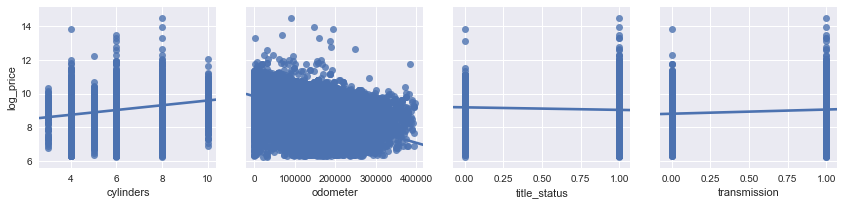

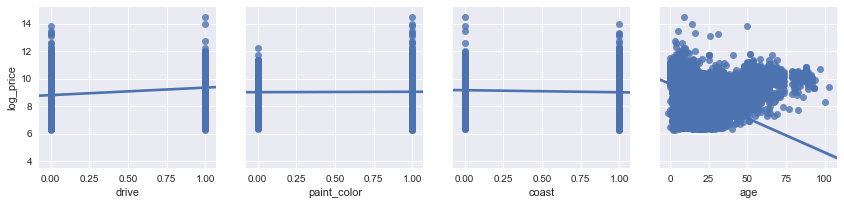

In [42]:
for i in row_groups:
    sns.pairplot(data=df, y_vars=['log_price'],x_vars=i, kind="reg", height=3)

In [75]:
dummies_df = pd.get_dummies(df, columns = ['manufacturer', 'condition', 'cylinders', 'fuel', 'size', 'type'], drop_first = True)

In [76]:
dummies_df.head()

,price,odometer,title_status,transmission,drive,paint_color,coast,log_price,age,manufacturer_euro,manufacturer_usa,condition_ok,condition_poor,cylinders_4.0,cylinders_5.0,cylinders_6.0,cylinders_8.0,cylinders_10.0,fuel_gas,fuel_other,size_full-size,size_mid-size,size_sub-compact,type_suv,type_truck,type_van
0,17899.0,63500.0,1,0.0,1.0,1.0,0,9.792500,8.0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
1,4600.0,110982.0,1,1.0,0.0,1.0,0,8.433812,12.0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0
2,28000.0,67348.0,1,1.0,1.0,1.0,0,10.239960,16.0,0,1,1,0,0,0,0,0,1,1,0,1,0,0,0,1,0
3,2500.0,129000.0,1,0.0,0.0,1.0,0,7.824046,16.0,0,1,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0
4,12000.0,65000.0,1,1.0,0.0,1.0,0,9.392662,5.0,1,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0


In [77]:
dummies_df.drop(columns = ['price', 'log_price'], inplace = True)
dummies_df.head()

,odometer,title_status,transmission,drive,paint_color,coast,age,manufacturer_euro,manufacturer_usa,condition_ok,condition_poor,cylinders_4.0,cylinders_5.0,cylinders_6.0,cylinders_8.0,cylinders_10.0,fuel_gas,fuel_other,size_full-size,size_mid-size,size_sub-compact,type_suv,type_truck,type_van
0,63500.0,1,0.0,1.0,1.0,0,8.0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
1,110982.0,1,1.0,0.0,1.0,0,12.0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0
2,67348.0,1,1.0,1.0,1.0,0,16.0,0,1,1,0,0,0,0,0,1,1,0,1,0,0,0,1,0
3,129000.0,1,0.0,0.0,1.0,0,16.0,0,1,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0
4,65000.0,1,1.0,0.0,1.0,0,5.0,1,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0


In [ ]:
plt.scatter(dummies_df.odometer, df.log_price)

In [ ]:
plt.scatter((dummies_df.age), df.log_price)

In [ ]:
X = dummies_df
y = df[['log_price']]
X_train , X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
X.corr()

In [ ]:
from sklearn import tree
regTree = tree.DecisionTreeRegressor()
regTree = regTree.fit(X_train, y_train)

In [ ]:
regTree.score(X_test, y_test)

In [ ]:
y_pred = np.exp(regTree.predict(X_test))

In [ ]:
rmse = np.sqrt(metrics.mean_squared_error(np.exp(y_test), y_pred))
rmse

In [ ]:
rmse

In [ ]:
test_std = np.exp(y_test).std()
test_std


In [ ]:
np.exp(y_test).mean()

In [ ]:
rmse/test_std

In [ ]:
scale = StandardScaler()
transformed_train = scale.fit_transform(X_train)
X_train = pd.DataFrame(transformed_train, columns = X_train.columns)
transformed_test = scale.transform(X_test)
X_test = pd.DataFrame(transformed_test, columns = X_test.columns)
#transformed_train = scale.fit_transform(X_train_df_poly)
#X_train_transformed = pd.DataFrame(transformed_train, columns = X_train_df_poly.columns)
#transformed_test = scale.transform(X_test_df_poly)
#X_test_transformed = pd.DataFrame(transformed_test, columns = X_test_df_poly.columns)

In [ ]:
regTree = tree.DecisionTreeRegressor()
regTree = regTree.fit(X_train, y_train)
y_pred = np.exp(regTree.predict(X_test))
rmse = np.sqrt(metrics.mean_squared_error(np.exp(y_test), y_pred))
rmse/test_std

In [ ]:
lasso = Lasso(alpha=200, normalize=False)
lasso.fit(X_train,y_train)
y_pred = lasso.predict(X_test)
rmse = np.sqrt(metrics.mean_squared_error(np.exp(y_test), y_pred))
rmse/test_std

In [ ]:
ridge = Ridge(alpha=200, normalize=False)
ridge.fit(X_train,y_train)
y_pred = ridge.predict(X_test)
rmse = np.sqrt(metrics.mean_squared_error(np.exp(y_test), y_pred))
rmse

In [ ]:
rmse/test_std

In [ ]:
bayes = linear_model.BayesianRidge()
bayes.fit(X_train, y_train)
y_pred = bayes.predict(X_test)
rmse = np.sqrt(metrics.mean_squared_error(np.exp(y_test), y_pred))
rmse

In [ ]:
rmse/test_std

In [ ]:
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
rmse = np.sqrt(metrics.mean_squared_error(np.exp(y_test), y_pred))
rmse

In [ ]:
sns.set(style="white")

corr = X_train.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [ ]:
kf = KFold(n_splits=10, shuffle=False).split(X)
kf

In [ ]:
for train_index, test_index in kf:
    print(train_index, test_index)

In [ ]:
folds = StratifiedKFold(n_splits = 10)
folds

In [ ]:
def get_score(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)

In [ ]:
scores_linear = []
scores_ridge = []
scores_bayes_ridge = []
scores_lasso = []
scores_treeReg = []

for train_index, test_index in kf:
    X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
    scores_treeReg.append(get_score(tree.DecisionTreeRegressor(), X_train, X_test, y_train, y_test))
print(scores_treeReg) 

In [ ]:
print(cross_val_score(tree.DecisionTreeRegressor(), X_train, y_train, cv=10).mean())

In [ ]:
print(cross_val_score(linear_model.LinearRegression(), X_train, y_train, cv=10).mean())

In [ ]:
print(cross_val_score(linear_model.Ridge(), X_train, y_train, cv=10).mean())

In [ ]:
print(cross_val_score(linear_model.Lasso(), X_train, y_train, cv=10).mean())